In [2]:
import pickle
import numpy
import matplotlib.pylab as plt
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [3]:
with open('100_decision_time_0810_15_55.pkl', 'rb') as f:
    rt = pickle.load(f)
    
with open('pop_rate_0809_18_51.pkl', 'rb') as f:
    data_70 = pickle.load(f)

with open('rmp_75mV_pop_rate_1121_16_38.pkl', 'rb') as f:
    data_75 = pickle.load(f)


with open('low_rmp_80mV_pop_rate_0812_16_21.pkl', 'rb') as f:
    data_80 = pickle.load(f)

In [4]:
# make a zero array 
def popRate_stat(data):
    # make a zero array 

    num_trial = len(data)
    num_time = len(data[0]['pop_rate_a'])
    rate_mat = numpy.zeros([num_trial, num_time])
    time = data[0]['time']




    for i in range((num_trial)):
        rate_mat[i,:] = data[i]['pop_rate_a']
    
    rate_mean = numpy.mean(rate_mat, axis=0)
    rate_std = numpy.std(rate_mat, axis=0)
    rate_sem = numpy.std(rate_mat, axis=0)/numpy.sqrt(num_trial)

    return time, rate_mean, rate_sem


In [5]:
def compare_rate(data_low, data_high, start, end):

    # data_low : a data set of lower rmp (more hyperpolarized)
    # data_low : a data set of higer rmp (more depolarized)


    plt.plot(data_high[0][start:end], data_high[1][start:end], 'm-', label='mean_1', linewidth=0.8)
    plt.fill_between(data_high[0][start:end], 
    (data_high[1] - data_high[2])[start:end], 
    data_high[1][start:end] + data_high[2][start:end], 
    color='m', alpha=0.2, label='_nolegend_')

    plt.plot(data_low[0][start:end], data_low[1][start:end], 'c-', label='mean_1', linewidth=0.8)
    plt.fill_between(data_low[0][start:end], 
    (data_low[1] - data_low[2])[start:end], 
    data_low[1][start:end] + data_low[2][start:end], 
    color='c', alpha=0.2, label='_nolegend_')
    
    
    plt.xlabel('time (ms)')
    plt.ylabel('Averaged firing rate (Spikes/s)')



    plt.legend(['rmp: -70mV','rmp: -80mV' ])


    plt.show()

In [6]:
stat_80 = popRate_stat(data_80)
stat_75 = popRate_stat(data_75)
stat_70 = popRate_stat(data_70)



In [7]:
#compare_rate(stat_80, stat_70, 0, 4000)



start = 0
end = 4000



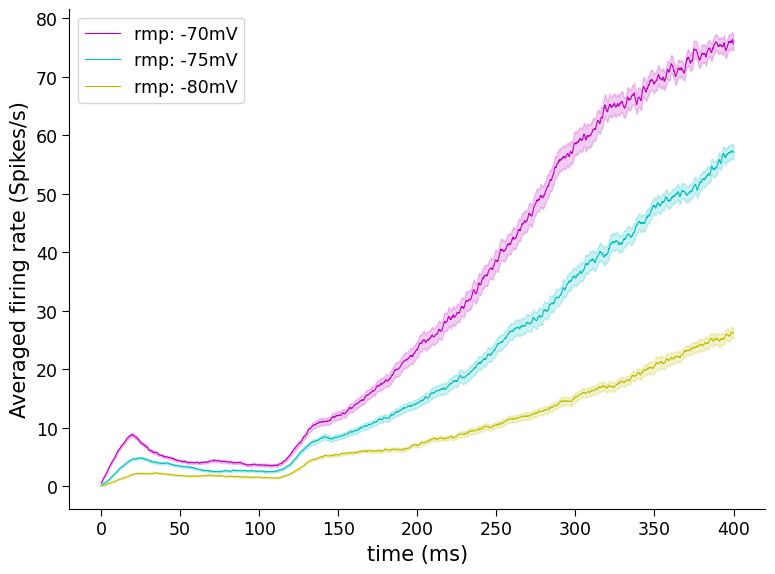

In [11]:

plt.plot(stat_70[0][start:end], stat_70[1][start:end], 'm-', label='mean_1', linewidth=0.8)
plt.fill_between(stat_70[0][start:end], 
(stat_70[1] - stat_70[2])[start:end], 
stat_70[1][start:end] + stat_70[2][start:end], 
color='m', alpha=0.2, label='_nolegend_')

plt.plot(stat_75[0][start:end], stat_75[1][start:end], 'c-', label='mean_1', linewidth=0.8)

plt.fill_between(stat_75[0][start:end], 
(stat_75[1] - stat_75[2])[start:end], 
stat_75[1][start:end] + stat_75[2][start:end], 
color='c', alpha=0.2, label='_nolegend_')


plt.plot(stat_80[0][start:end], stat_80[1][start:end], 'y-', label='mean_1', linewidth=0.8)

plt.fill_between(stat_80[0][start:end], 
(stat_80[1] - stat_80[2])[start:end], 
stat_80[1][start:end] + stat_80[2][start:end], 
color='y', alpha=0.2, label='_nolegend_')






plt.xlabel('time (ms)')
plt.ylabel('Averaged firing rate (Spikes/s)')



plt.legend(['rmp: -70mV','rmp: -75mV', 'rmp: -80mV' ])


plt.show()